参考: https://qiita.com/maskot1977/items/b2cfb369f60ad02887b0

ライブラリのインストール

In [47]:
import numpy as np
import pandas as pd
import scipy as sp
%matplotlib inline
import matplotlib.pyplot as plt
from pandas import plotting

In [129]:
# 機械学習関連のライブラリ群

# from sklearn.cross_validation import train_test_split # 訓練データとテストデータに分割 # cross_validationは廃止されている
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix # 混合行列

from sklearn.decomposition import PCA #主成分分析
from sklearn.linear_model import LogisticRegression # ロジスティック回帰
from sklearn.neighbors import KNeighborsClassifier # K近傍法
from sklearn.svm import SVC # サポートベクターマシン
from sklearn.tree import DecisionTreeClassifier # 決定木
from sklearn.ensemble import RandomForestClassifier # ランダムフォレスト
from sklearn.ensemble import AdaBoostClassifier # AdaBoost
from sklearn.naive_bayes import GaussianNB # ナイーブ・ベイズ
# from sklearn.lda import LDA # 線形判別分析
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# from sklearn.qda import QDA # 二次判別分析
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA


データの読み込み

In [49]:
df1 = pd.read_csv('./data/diabetes.csv')
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [71]:
df1.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

pandasの操作の簡単な例

In [50]:
toy_data = pd.DataFrame(
    [
        [1,4,7,10,13,16],
        [2,5,8,11,14,27],
        [3,6,9,12,15,17],
        [21,24,27,20,23,26]
    ],
    index = ['i1','i2','i3', 'i4'],
    columns = list("abcdef")
)

toy_data


,a,b,c,d,e,f
i1,1,4,7,10,13,16
i2,2,5,8,11,14,27
i3,3,6,9,12,15,17
i4,21,24,27,20,23,26


In [51]:
toy_data[toy_data['f'] < 20]

,a,b,c,d,e,f
i1,1,4,7,10,13,16
i3,3,6,9,12,15,17


In [52]:
toy_data[toy_data['f'] >= 20]

,a,b,c,d,e,f
i2,2,5,8,11,14,27
i4,21,24,27,20,23,26


In [53]:
toy_data['class'] = [0 if i < 20 else 1 for i in toy_data['f'].tolist()]

In [54]:
toy_data

,a,b,c,d,e,f,class
i1,1,4,7,10,13,16,0
i2,2,5,8,11,14,27,1
i3,3,6,9,12,15,17,0
i4,21,24,27,20,23,26,1


データの分析  
データの一部を見てみる

In [55]:
df1[df1['Outcome'] == 0].head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0


In [56]:
df1[df1['Outcome'] == 1].head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1


In [73]:
df1['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

変数を軸にとって散布図を作成してみる

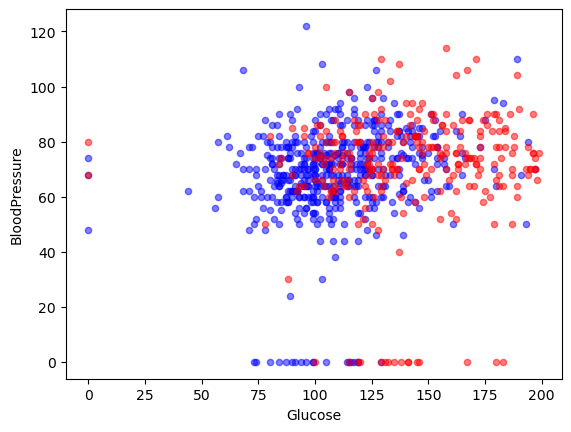

In [57]:
fig, ax = plt.subplots(1, 1)

# Outcome が 0 の行を抜き出して、x軸を Glucose 、 y軸を BloodPressure として青色の丸を散布する
df1[df1['Outcome'] == 0].plot(kind='scatter', x=u'Glucose', y=u'BloodPressure', ax=ax, 
                              c='blue', alpha=0.5)

# Outcome が 1 の行を抜き出して、x軸を Glucose 、 y軸を BloodPressure として赤色の丸を散布する
df1[df1['Outcome'] == 1].plot(kind='scatter', x=u'Glucose', y=u'BloodPressure', ax=ax, 
                              c='red', alpha=0.5)
plt.show()


ヒストグラムを作成

Text(0.5, 1.0, 'Histgram of Glucose')

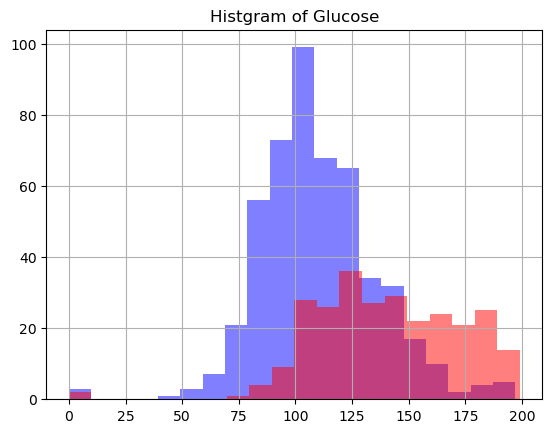

In [58]:
df1[df1['Outcome'] == 0]['Glucose'].hist(bins=20, alpha=0.5, color='blue')
df1[df1['Outcome'] == 1]['Glucose'].hist(bins=20, alpha=0.5, color='red')
plt.title('Histgram of Glucose')

Text(0.5, 1.0, 'Histgram of BloodPressure')

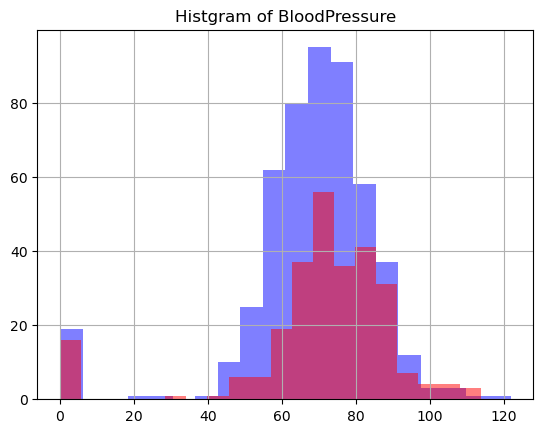

In [59]:
df1[df1['Outcome'] == 0]['BloodPressure'].hist(bins=20, alpha=0.5, color='blue')
df1[df1['Outcome'] == 1]['BloodPressure'].hist(bins=20, alpha=0.5, color='red')
plt.title('Histgram of BloodPressure')

分類にしたがって、各変数の散布図行列を作成

In [103]:
color_codes = {0:'blue', 1:'red'}
colors = [color_codes[x] for x in df1['Outcome'].tolist()]
colors

['red',
 'blue',
 'red',
 'blue',
 'red',
 'blue',
 'red',
 'blue',
 'red',
 'red',
 'blue',
 'red',
 'blue',
 'red',
 'red',
 'red',
 'red',
 'red',
 'blue',
 'red',
 'blue',
 'blue',
 'red',
 'red',
 'red',
 'red',
 'red',
 'blue',
 'blue',
 'blue',
 'blue',
 'red',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'red',
 'red',
 'red',
 'blue',
 'blue',
 'blue',
 'red',
 'blue',
 'red',
 'blue',
 'blue',
 'red',
 'blue',
 'blue',
 'blue',
 'blue',
 'red',
 'blue',
 'blue',
 'red',
 'blue',
 'blue',
 'blue',
 'blue',
 'red',
 'blue',
 'blue',
 'red',
 'blue',
 'red',
 'blue',
 'blue',
 'blue',
 'red',
 'blue',
 'red',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'red',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'red',
 'blue',
 'blue',
 'blue',
 'red',
 'blue',
 'blue',
 'blue',
 'blue',
 'red',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'red',
 'red',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'red',
 'red',
 'red',
 'blue',
 'blue',
 'red',
 'red',

In [85]:
df1['Outcome']

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

散布図行列の作成  
NaNによってデータの欠損している行の削除をしているが、このデータセットの場合どのような値になっているか確認する必要がある  
colorsで色を指定しているが、`ValueError: 'color' kwarg must be a color or sequence of color specs.  For a sequence of values to be color-mapped, use the 'c' argument instead.`とエラーが出る

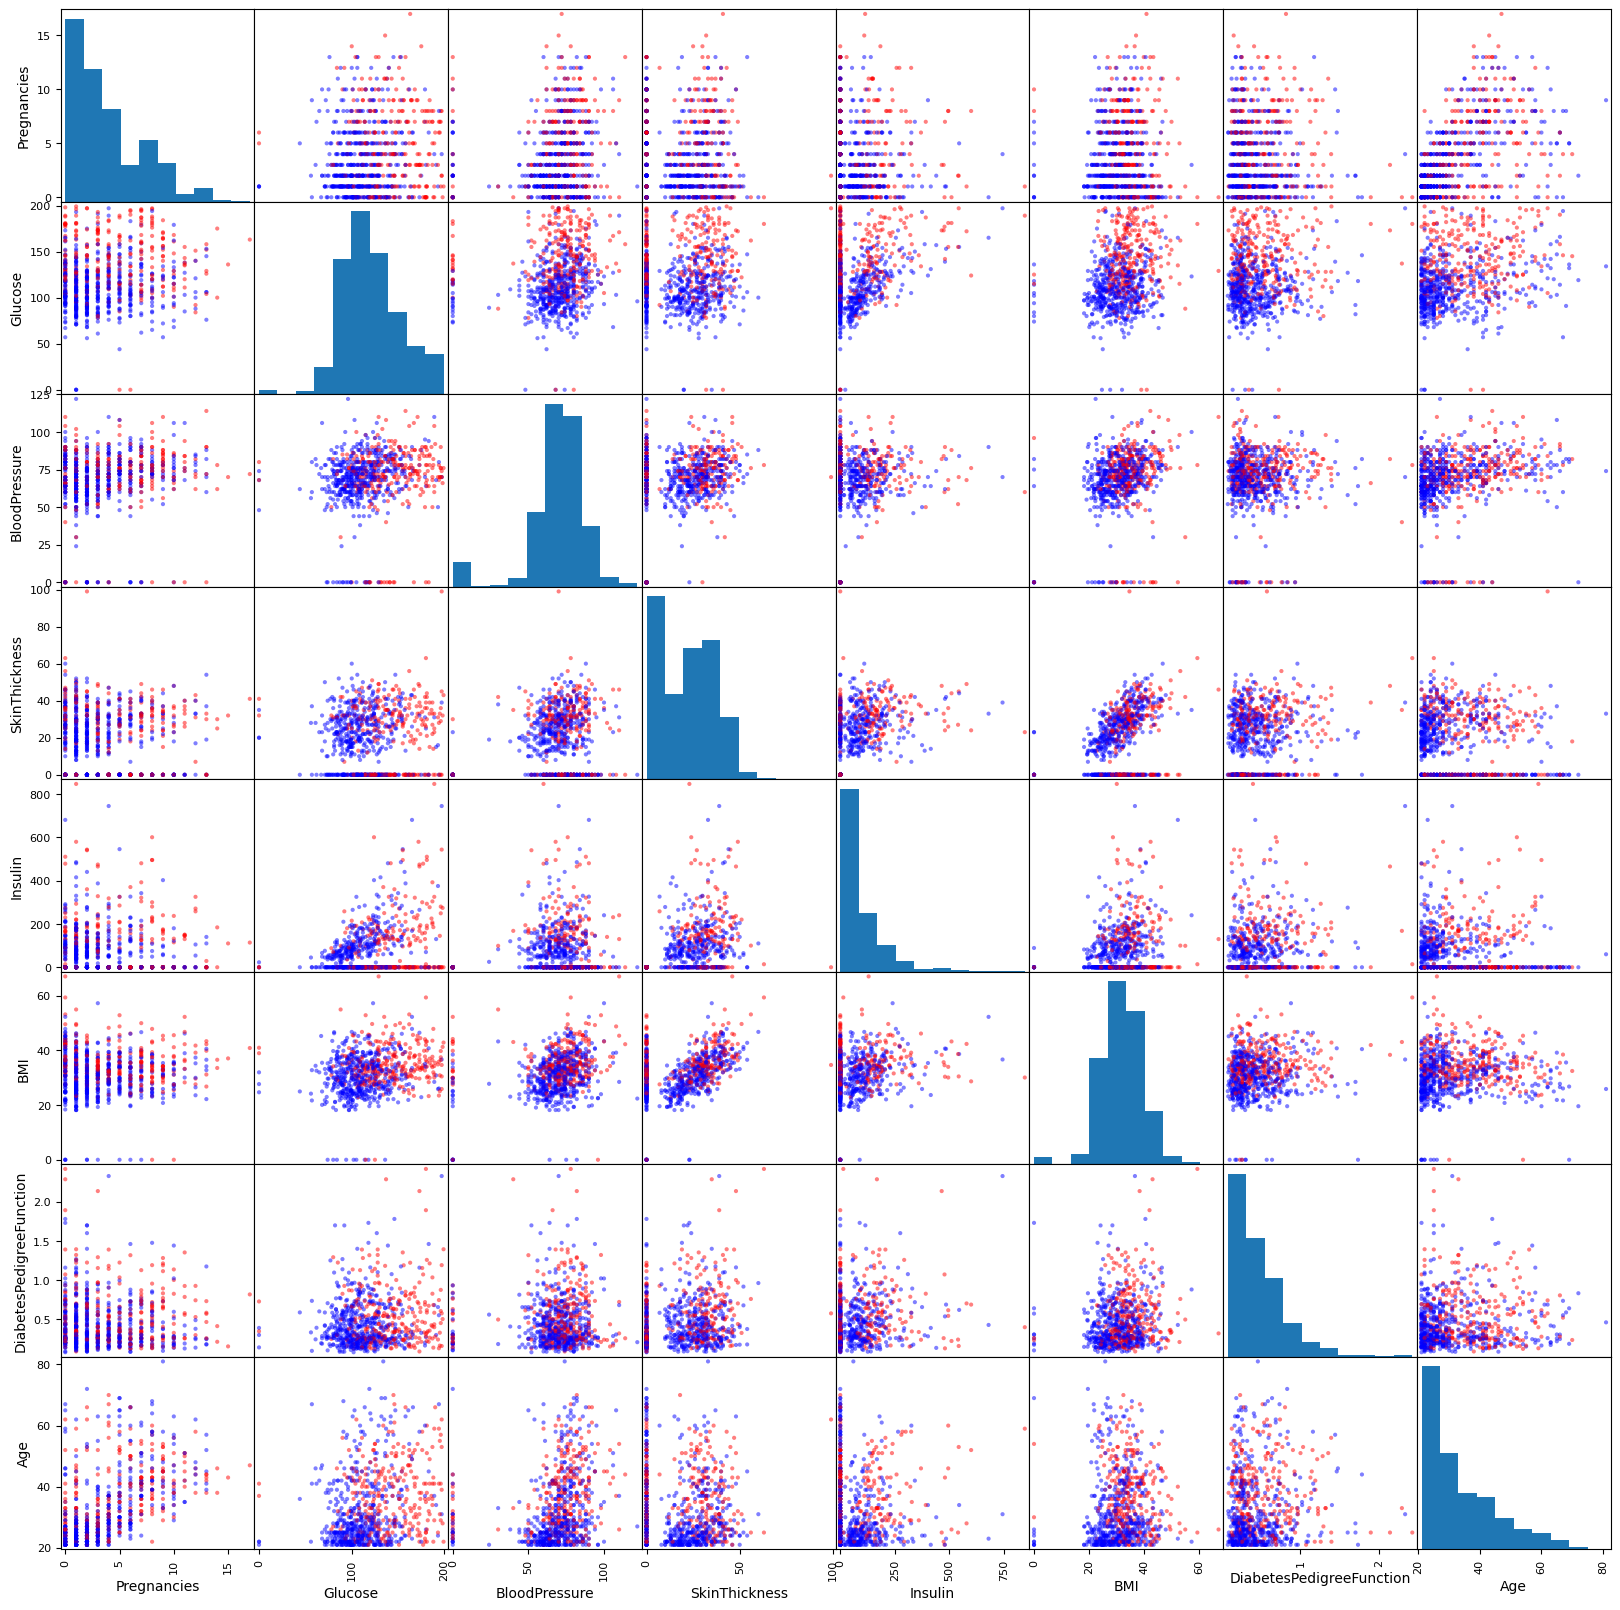

In [105]:
# plotting.scatter_matrix(df1.dropna(axis=1)[df1.columns[:8]], figsize=(20, 20), color=colors, alpha=0.5) # error
# plotting.scatter_matrix(df1[df1.columns[:8]], figsize=(20, 20), c=df1['Outcome'], alpha=0.5)
plotting.scatter_matrix(df1[df1.columns[:8]], figsize=(20, 20), c=colors, alpha=0.5)
plt.show()

主成分分析

各列の値をその列の平均値を引いて、その結果を列の標準偏差で割ることで、各列の値を正規化  
また、欠損値（NaN）が存在する場合は、0でそれらを補完

In [107]:
dfs = df1.apply(lambda x: (x-x.mean())/x.std(), axis=0).fillna(0) # データの正規化

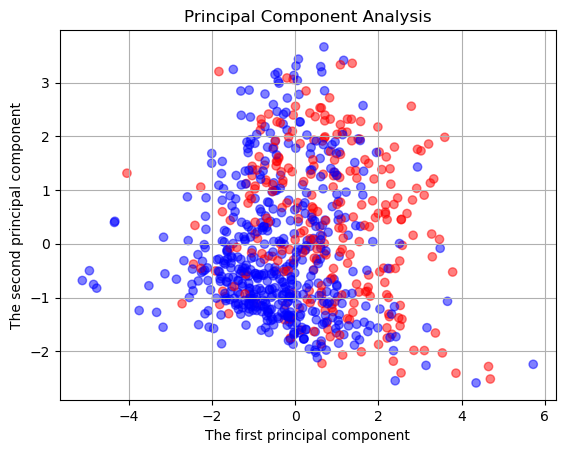

In [106]:
pca = PCA()
pca.fit(dfs.iloc[:, :8])
# データを主成分空間に写像 = 次元圧縮
feature = pca.transform(dfs.iloc[:, :8])
#plt.figure(figsize=(6, 6))
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.5, c=colors)
plt.title("Principal Component Analysis")
plt.xlabel("The first principal component")
plt.ylabel("The second principal component")
plt.grid()
plt.show()

説明変数と目的変数に分ける

In [108]:
X = dfs.iloc[:, :8]
y = df1.iloc[:, 8]

In [112]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639530,0.847771,0.149543,0.906679,-0.692439,0.203880,0.468187,1.425067
1,-0.844335,-1.122665,-0.160441,0.530556,-0.692439,-0.683976,-0.364823,-0.190548
2,1.233077,1.942458,-0.263769,-1.287373,-0.692439,-1.102537,0.604004,-0.105515
3,-0.844335,-0.997558,-0.160441,0.154433,0.123221,-0.493721,-0.920163,-1.040871
4,-1.141108,0.503727,-1.503707,0.906679,0.765337,1.408828,5.481337,-0.020483


In [115]:
# y.head()
pd.DataFrame(y).T # 目的変数を確認。縦に長いと見にくいので転置して表示。

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
Outcome,1,0,1,0,1,0,1,0,1,1,...,0,1,0,1,0,0,0,0,1,0


訓練データとテストデータの分割  
訓練データ:テストデータ = 6:4

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4) # 訓練データ・テストデータへのランダムな分割

In [118]:
X_train.head() # 先頭５行を表示して確認

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
369,-0.844335,0.378620,1.699466,0.467869,0.522374,0.102411,-0.717947,0.999905
508,-0.547562,-1.153942,-0.987066,0.154433,-0.032969,-0.201997,1.497377,-1.040871
635,2.716942,-0.528406,0.149543,-1.287373,-0.692439,-0.100528,-0.020754,0.404679
669,1.529850,1.035432,0.459528,0.593243,0.175285,-0.138579,-0.929217,0.999905
353,-0.844335,-0.966281,-0.367098,-0.535127,-0.319318,-0.607874,0.326334,-0.785774


In [120]:
pd.DataFrame(y_train).T # 縦に長いと見にくいので転置して表示。

,369,508,635,669,353,61,50,383,734,546,...,427,453,306,193,116,107,13,169,494,752
Outcome,1,0,1,0,0,1,0,0,0,1,...,1,0,1,1,1,0,1,0,0,0


ロジスティック回帰

In [121]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [122]:
# 正解率 (train) : 学習に用いたデータをどのくらい正しく予測できるか
clf.score(X_train,y_train)

0.7760869565217391

In [124]:
# 正解率 (test) : 学習に用いなかったデータをどのくらい正しく予測できるか
clf.score(X_test,y_test)

0.788961038961039

In [125]:
y_predict = clf.predict(X_test)

In [127]:
pd.DataFrame(y_predict).T

,0,1,2,3,4,5,6,7,8,9,...,298,299,300,301,302,303,304,305,306,307
0,0,0,1,1,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0


In [128]:
# 予測結果と、正解（本当の答え）がどのくらい合っていたかを表す混合行列
pd.DataFrame(confusion_matrix(y_predict, y_test), index=['predicted 0', 'predicted 1'], columns=['real 0', 'real 1'])

,real 0,real 1
predicted 0,178,32
predicted 1,33,65


他の手法

In [130]:
names = ["Logistic Regression", "Nearest Neighbors", 
         "Linear SVM", "Polynomial SVM", "RBF SVM", "Sigmoid SVM", 
         "Decision Tree","Random Forest", "AdaBoost", "Naive Bayes", 
         "Linear Discriminant Analysis","Quadratic Discriminant Analysis"]

classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(),
    SVC(kernel="linear"),
    SVC(kernel="poly"),
    SVC(kernel="rbf"),
    SVC(kernel="sigmoid"),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    LDA(),
    QDA()]


In [132]:
result = []
for name, clf in zip(names, classifiers): # 指定した複数の分類機を順番に呼び出す
    clf.fit(X_train, y_train) # 学習
    score1 = clf.score(X_train, y_train) # 正解率（train）の算出
    score2 = clf.score(X_test, y_test) # 正解率（test）の算出
    result.append([score1, score2]) # 結果の格納

# test の正解率の大きい順に並べる
# df_result = pd.DataFrame(result, columns=['train', 'test'], index=names).sort('test', ascending=False)
# もし上のコードが動かない場合、以下のコーを試してみてください。
df_result = pd.DataFrame(result, columns=['train', 'test'], index=names).sort_values('test', ascending=False)


In [133]:
df_result

,train,test
Linear SVM,0.769565,0.792208
Logistic Regression,0.776087,0.788961
Linear Discriminant Analysis,0.776087,0.782468
AdaBoost,0.843478,0.759740
Random Forest,1.000000,0.743506
Nearest Neighbors,0.808696,0.737013
Polynomial SVM,0.808696,0.737013
RBF SVM,0.836957,0.737013
Sigmoid SVM,0.706522,0.730519
Naive Bayes,0.769565,0.717532


<Axes: >

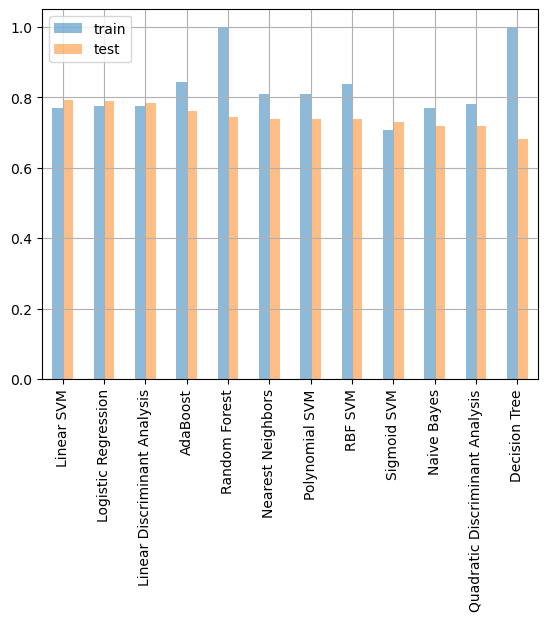

In [134]:
# 棒グラフの描画
df_result.plot(kind='bar', alpha=0.5, grid=True)

訓練データの選び方によって正解率の数字が変化してしまう  
そこで教師データを何度も作り直して正解率を計算

In [135]:
result = []
for trial in range(20): # 20 回繰り返す
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4) # 訓練データ・テストデータの生成
    for name, clf in zip(names, classifiers): # 指定した複数の分類機を順番に呼び出す
        clf.fit(X_train, y_train) # 学習
        score1 = clf.score(X_train, y_train) # 正解率（train）の算出
        score2 = clf.score(X_test, y_test) # 正解率（test）の算出
        result.append([name, score1, score2]) # 結果の格納

df_result = pd.DataFrame(result, columns=['classifier', 'train', 'test']) # 今回はまだ並べ替えはしない


In [136]:
df_result # 結果の確認。同じ分類器の結果が複数回登場していることに注意。

,classifier,train,test
0,Logistic Regression,0.782609,0.762987
1,Nearest Neighbors,0.819565,0.769481
2,Linear SVM,0.786957,0.756494
3,Polynomial SVM,0.810870,0.759740
4,RBF SVM,0.826087,0.769481
...,...,...,...
235,Random Forest,1.000000,0.753247
236,AdaBoost,0.856522,0.724026
237,Naive Bayes,0.769565,0.743506
238,Linear Discriminant Analysis,0.780435,0.743506


In [138]:
# 分類器 (classifier) 毎にグループ化して正解率の平均を計算し、test の正解率の平均の大きい順に並べる
# df_result_mean = df_result.groupby('classifier').mean().sort('test', ascending=False)
# もし上のコードが動かない場合、以下のコーを試してみてください。
df_result_mean = df_result.groupby('classifier').mean().sort_values('test', ascending=False)


In [139]:
df_result_mean # 結果の確認

,train,test
classifier,,
Logistic Regression,0.781848,0.767045
Linear SVM,0.785217,0.766883
Linear Discriminant Analysis,0.781087,0.763474
RBF SVM,0.835000,0.760714
Random Forest,1.000000,0.760065
Naive Bayes,0.764457,0.750812
Quadratic Discriminant Analysis,0.773696,0.740909
AdaBoost,0.851739,0.739773
Polynomial SVM,0.807174,0.736201


In [140]:
# エラーバーの表示に用いる目的で、標準偏差を計算する
errors = df_result.groupby('classifier').std()


In [141]:
errors # 結果の確認


,train,test
classifier,,
AdaBoost,0.014170,0.021154
Decision Tree,0.000000,0.027728
Linear Discriminant Analysis,0.010150,0.019488
Linear SVM,0.010308,0.018595
Logistic Regression,0.010252,0.018150
Naive Bayes,0.008472,0.024087
Nearest Neighbors,0.014883,0.024435
Polynomial SVM,0.011331,0.017528
Quadratic Discriminant Analysis,0.011414,0.025751


<Axes: xlabel='classifier'>

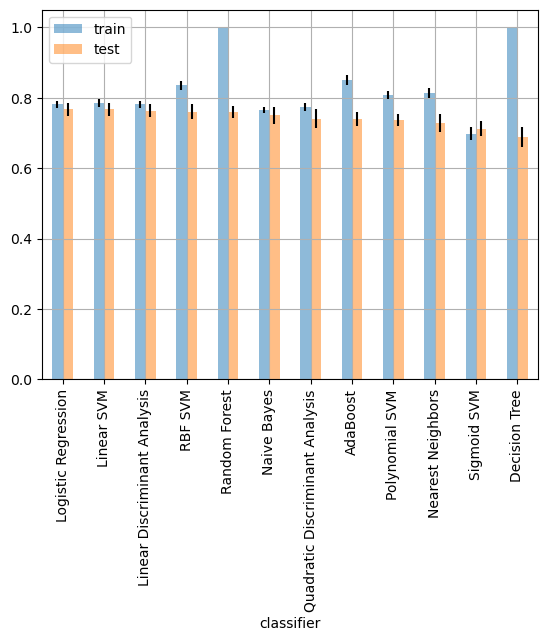

In [142]:
# 平均値と標準偏差を用いて棒グラフを描画
df_result_mean.plot(kind='bar', alpha=0.5, grid=True, yerr=errors)

以上様々な分類器を用いて、糖尿病かどうかの予測を行った  
パラメータは全てデフォルト値を用いたためパラメータチューニングをすればより予測性能が向上するかもしれない